 PROBLEM:to find out the fake note or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

import seaborn as sns

In [5]:
data=pd.read_csv('bill_authentication.csv')
data.head(50)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.621600,8.66610,-2.80730,-0.446990,0
1,4.545900,8.16740,-2.45860,-1.462100,0
2,3.866000,-2.63830,1.92420,0.106450,0
3,3.456600,9.52280,-4.01120,-3.594400,0
4,0.329240,-4.45520,4.57180,-0.988800,0
5,4.368400,9.67180,-3.96060,-3.162500,0
6,3.591200,3.01290,0.72888,0.564210,0
7,2.092200,-6.81000,8.46360,-0.602160,0
8,3.203200,5.75880,-0.75345,-0.612510,0
9,1.535600,9.17720,-2.27180,-0.735350,0


In [6]:
data.shape


(1372, 5)

In [7]:
data.size

6860

In [ ]:
data['Class'].unique()

In [ ]:
data['Class'].count()

In [16]:
data.dtypes.sort_values(ascending=False)

Entropy     float64
Curtosis    float64
Skewness    float64
Variance    float64
Class         int64
dtype: object

In [17]:
data.isnull().sum().sort_values(ascending=False).head(20)

Class       0
Entropy     0
Curtosis    0
Skewness    0
Variance    0
dtype: int64

In [18]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [28]:
data['Variance'].value_counts().head(10)

 0.5706    5
 0.3292    4
 0.3798    4
 0.5195    4
-2.6479    3
-1.3000    3
-1.8584    3
 0.9297    3
-0.2062    3
 0.6005    2
Name: Variance, dtype: int64

In [12]:
data['Entropy'].value_counts().head(10)

-0.29570    5
-0.98880    5
-0.23751    4
-7.50340    4
 0.36119    4
-0.44440    4
-0.56210    4
 0.32110    4
-0.98490    4
-0.61251    3
Name: Entropy, dtype: int64

In [11]:
data['Skewness'].value_counts().head(10)

-4.455200    6
-3.263300    5
 0.709800    4
-0.024800    4
-3.797100    4
 9.220700    3
 9.566300    3
 8.188100    3
 7.886000    3
 0.039307    3
Name: Skewness, dtype: int64

In [10]:
data['Curtosis'].value_counts().head(10)

 4.57180    5
 3.08950    5
 1.24210    5
 0.75720    4
-3.70440    3
-1.66430    3
-1.33100    3
-3.78670    3
 0.68604    3
-3.13380    3
Name: Curtosis, dtype: int64

In [8]:
data['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

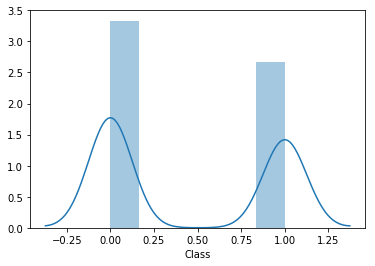

In [9]:
sns.distplot(data['Class'])


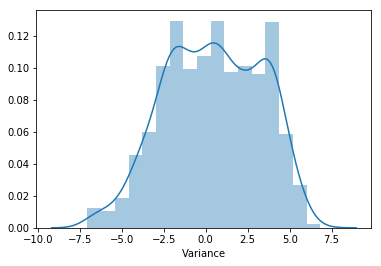

In [13]:
sns.distplot(data['Variance'])


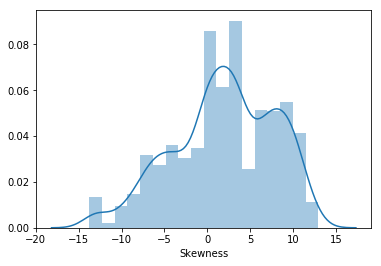

In [14]:
sns.distplot(data['Skewness'])


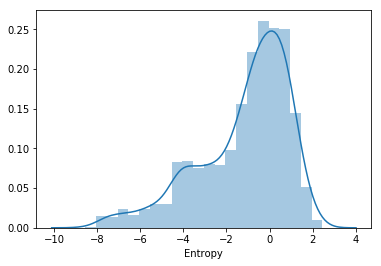

In [15]:
sns.distplot(data['Entropy'])


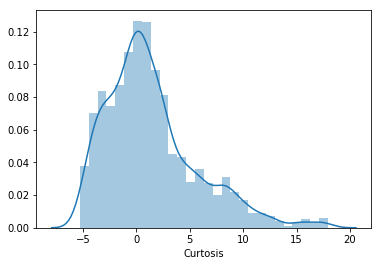

In [16]:
sns.distplot(data['Curtosis'])


In [8]:
print ("The skewness of Variance is ",(data['Variance'].skew()))


The skewness of Variance is  -0.14938770055109987


In [9]:
print ("The skewness of Entropy is ",(data['Entropy'].skew()))

The skewness of Entropy is  -1.0222430438083978


In [10]:
print ("The skewness of Curtosis is ",(data['Curtosis'].skew()))

The skewness of Curtosis is  1.088568543275335


In [11]:
print ("The skewness of Curtosis is ",(data['Curtosis'].skew()))

The skewness of Skewness is  -0.394103474447308


In [12]:
print ("The skewness of Class is ",(data['Class'].skew()))

The skewness of Class is  0.22319085746799167


In [15]:
# splitting the data given into two parts i.e features and target variables
x=data.drop('Class',axis=1)# divides into vertical
y=data['Class']
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [ ]:
# now dividing the data into training and test data 


In [18]:

from sklearn.model_selection import train_test_split
from sklearn import tree
validation_size=0.20# it will test on 20% available data and 80% will be used to train
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)# seed is used to avoid randomness

In [33]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
predictions=(clf.predict(x_test))


In [34]:
print(clf.predict(x_test))

[0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1]


In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(y_test,predictions))



0.9927272727272727


In [36]:
print(confusion_matrix(y_test,predictions))

[[156   2]
 [  0 117]]
